In [1]:
import os
import torch
import numpy as np

import scanpy as sc
from anndata import AnnData
import anndata as ad
import matplotlib.pyplot as plt

result_dir = "../edges/"
raw_type=False
use_edge=False
normalize=True

In [2]:
import matplotlib.pyplot as plt
# Set global font sizes using rcParams
plt.rcParams.update({
    'font.size': 18,            # Global font size
    'axes.titlesize': 20,       # Font size of the axes title
    'axes.labelsize': 20,       # Font size of the x and y labels
    'xtick.labelsize': 16,      # Font size of the x-tick labels
    'ytick.labelsize': 16,      # Font size of the y-tick labels
    'legend.fontsize': 18,      # Font size of the legend
    'figure.titlesize': 24      # Font size of the figure title
})

In [3]:
samples=['H20.33.001.CX28.MTG.02.007.1.02.02', 'H20.33.001.CX28.MTG.02.007.1.02.03', 'H20.33.001.Cx28.MTG.02.007.1.01.03', 'H20.33.004.Cx26.MTG.02.007.1.01.04', 'H20.33.004.Cx26.MTG.02.007.1.01.05', 'H20.33.004.Cx26.MTG.02.007.1.02.02', 'H20.33.004.Cx26.MTG.02.007.1.02.03', 'H20.33.004.Cx26.MTG.02.007.1.02.04', 'H20.33.012.Cx24.MTG.02.007.1.01.01', 'H20.33.012.Cx24.MTG.02.007.1.03.02', 'H20.33.012.Cx24.MTG.02.007.1.03.03', 'H20.33.015.CX24.MTG.02.007.1.03.01', 'H20.33.015.CX24.MTG.02.007.1.03.02', 'H20.33.015.Cx24.MTG.02.007.1.03.03', 'H20.33.025.Cx28.MTG.02.007.1.01.02', 'H20.33.025.Cx28.MTG.02.007.1.01.04', 'H20.33.025.Cx28.MTG.02.007.1.01.06', 'H20.33.035.Cx26.MTG.02.007.1.01.03', 'H20.33.035.Cx26.MTG.02.007.1.01.04', 'H20.33.040.Cx25.MTG.02.007.1.01.03', 'H20.33.040.Cx25.MTG.02.007.1.01.04', 'H20.33.044.Cx26.MTG.02.007.1.01.02', 'H20.33.044.Cx26.MTG.02.007.1.01.03', 'H20.33.044.Cx26.MTG.02.007.1.01.04', 'H21.33.001.Cx22.MTG.02.007.1.01.03', 'H21.33.001.Cx22.MTG.02.007.1.01.04', 'H21.33.005.Cx18.MTG.02.007.02.03', 'H21.33.005.Cx18.MTG.02.007.02.04', 'H21.33.006.Cx28.MTG.02.007.1.01.09.02', 'H21.33.006.Cx28.MTG.02.007.1.01.09.03', 'H21.33.006.Cx28.MTG.02.007.1.01.09.04', 'H21.33.011.Cx26.MTG.02.007.3.01.04', 'H21.33.011.Cx26.MTG.02.007.3.01.05', 'H21.33.011.Cx26.MTG.02.007.3.01.06', 'H21.33.012.Cx26.MTG.02.007.1.01.04', 'H21.33.012.Cx26.MTG.02.007.1.01.05', 'H21.33.012.Cx26.MTG.02.007.1.01.06', 'H21.33.013.Cx24.MTG.02.007.1.06', 'H21.33.014.CX26.MTG.02.007.1.02.02', 'H21.33.015.Cx26.MTG.02.007.1.0', 'H21.33.015.Cx26.MTG.02.007.1.1', 'H21.33.015.Cx26.MTG.02.007.1.2', 'H21.33.016.Cx26.MTG.02.007.3.01.01', 'H21.33.016.Cx26.MTG.02.007.3.01.02', 'H21.33.016.Cx26.MTG.02.007.3.01.03', 'H21.33.019.Cx30.MTG.02.007.5.0', 'H21.33.019.Cx30.MTG.02.007.5.01.01', 'H21.33.019.Cx30.MTG.02.007.5.01.02', 'H21.33.021.Cx26.MTG.02.007.1.04', 'H21.33.021.Cx26.MTG.02.007.1.06', 'H21.33.022.Cx26.MTG.02.007.2.M.02', 'H21.33.022.Cx26.MTG.02.007.2.M.03', 'H21.33.022.Cx26.MTG.02.007.2.M.04', 'H21.33.023.Cx26.MTG.02.007.1.03.01', 'H21.33.023.Cx26.MTG.02.007.1.03.04', 'H21.33.023.Cx26.MTG.02.007.1.03.05', 'H21.33.025.CX26.MTG.02.007.4.01.02', 'H21.33.025.CX26.MTG.02.007.4.01.04', 'H21.33.025.CX26.MTG.02.007.4.01.06', 'H21.33.028.CX28.MTG.02.007.1.01.01', 'H21.33.028.Cx28.MTG.02.007.1.02.02', 'H21.33.028.Cx28.MTG.02.007.1.02.04', 'H21.33.031.CX24.MTG.02.007.1.01.01', 'H21.33.031.CX24.MTG.02.007.1.01.02', 'H21.33.032.CX24.MTG.02.007.1.01.04', 'H21.33.038.Cx20.MTG.02.007.3.01.02', 'H21.33.038.Cx20.MTG.02.007.3.01.04', 'H21.33.040.Cx22.MTG.02.007.3.03.01', 'H21.33.040.Cx22.MTG.02.007.3.03.03', 'H21.33.040.Cx22.MTG.02.007.3.03.04']
sample='H20.33.001.CX28.MTG.02.007.1.02.03'#samples[7]
data_dir = "../../data/AD/processed1/"
str_position_x='centerx'
str_position_y='centery'
str_cell_type='subclass'
cell_types=['Astrocyte', 'Chandelier', 'Endothelial', 'L2/3 IT', 'L4 IT', 'L5 ET', 'L5 IT', 'L5/6 NP', 'L6 CT', 'L6 IT', 'L6 IT Car3', 'L6b', 'Lamp5', 'Lamp5 Lhx6', 'Microglia-PVM', 'OPC', 'Oligodendrocyte', 'Pax6', 'Pvalb', 'Sncg', 'Sst', 'Sst Chodl', 'VLMC', 'Vip']
print(cell_types)

genes = torch.load("/".join(data_dir.split("/")[:-2]) + "/genes.pth")
print("GFAP" in genes,genes)
print(list(sorted(genes)))
type_exp_dict=np.load(data_dir + sample + "_TypeExp.npz", allow_pickle=True)

cell_type_pair_sequence=[]
for cell_typei in cell_types:
    for cell_typej in cell_types:
        cell_type_pair_sequence.append(cell_typei+"->"+cell_typej)

feature_names=[]
for i in range(len(cell_types)):
    for j in range(len(genes)):
        feature_names.append(cell_types[i]+"--"+genes[j])

['Astrocyte', 'Chandelier', 'Endothelial', 'L2/3 IT', 'L4 IT', 'L5 ET', 'L5 IT', 'L5/6 NP', 'L6 CT', 'L6 IT', 'L6 IT Car3', 'L6b', 'Lamp5', 'Lamp5 Lhx6', 'Microglia-PVM', 'OPC', 'Oligodendrocyte', 'Pax6', 'Pvalb', 'Sncg', 'Sst', 'Sst Chodl', 'VLMC', 'Vip']
False ['PRRT4', 'GRIP2', 'FOXP2', 'PDZD2', 'KIAA1217', 'PALMD', 'LRRC4C', 'ASIC2', 'NPAS3', 'LUZP2', 'GRIN2A', 'NLGN1', 'NTNG2', 'TACR1', 'PDGFD', 'ANK1', 'DLX1', 'CBLN2', 'ZNF804A', 'CACNA2D3', 'CDH6', 'CD22', 'ETNPPL', 'CALB1', 'TSHZ2', 'FGF13', 'KIRREL3', 'ROBO1', 'RBFOX3', 'ASTN2', 'ID3', 'TH', 'TENM2', 'ZMAT4', 'CLSTN2', 'SEMA6D', 'HPSE2', 'BTBD11', 'LRP1B', 'NOS1', 'GPC5', 'SNTB1', 'COL11A1', 'TMEM255A', 'SATB2', 'SORCS3', 'FBXL7', 'GRM8', 'GALNTL6', 'NOSTRIN', 'DCC', 'SOX6', 'MEIS2', 'STXBP6', 'SMYD1', 'SCUBE1', 'LAMA4', 'CNTN5', 'GRM7', 'KCNMB2', 'CUX2', 'LAMP5', 'SLIT3', 'TAFA1', 'PRKG1', 'CSMD1', 'CNTNAP5', 'NFIA', 'FRMPD4', 'GRID2', 'HS6ST3', 'SORCS1', 'ATRNL1', 'ADAMTS3', 'SLC24A2', 'RBFOX1', 'TMEM132D', 'NKAIN2', 'PEX5L'

In [4]:
import pandas as pd
def load_sample_position(sample,add_column=True,no_other=True):
    df = pd.read_csv(data_dir+sample+".csv")
    # Step 1: Create a new column based on conditions
    df['cell_type_plot'] = df[str_cell_type].apply(
        lambda x: x[:2] if x.startswith('L') and x[1].isdigit() else "Other_not_excitatory_neuron"
    )
    print(np.unique(df['cell_type_plot'].values))
    adata_position=AnnData(np.zeros((df.shape[0],len(genes))))
    adata_position.obs['cell_type'] = df[str_cell_type].values
    adata_position.obs["cell_type_plot"]=df['cell_type_plot'].values
    adata_position.obs["group"]=df['cell_type_plot'].values
    adata_position.obs['to_position_x']=df[str_position_x].values
    adata_position.obs['to_position_y']=df[str_position_y].values
    adata_position.obs['from_position_x']=df[str_position_x].values
    adata_position.obs['from_position_y']=df[str_position_y].values

    if no_other:
        adata_position=adata_position[adata_position.obs["cell_type_plot"]!="Other_not_excitatory_neuron",:]
    
    return df,adata_position

df_position,adata_position=load_sample_position(sample)

['L2' 'L4' 'L5' 'L6' 'Other_not_excitatory_neuron']


In [5]:
def aggregate_interation_strength(sample,select_hvg=False):
    results=torch.load(result_dir+"edges_"+sample+".pth",map_location=torch.device('cpu'))

    position_x=results["position_x"][:,0]
    position_y=results["position_y"][:,0]
    cell_type_name=np.array(results["cell_type_name"])
    cell_type_target=cell_type_name[:,0]

    type_exps=torch.stack([torch.Tensor(type_exp_dict[cell_type_targeti]) for cell_type_targeti in cell_type_target],dim=0)
    results["y"]=results["y"]+type_exps
    
    attention_scores=results["attention_score"]
    cell_type_names = np.array(results["cell_type_name"])

    proportion=torch.abs(attention_scores)
    proportion=proportion/torch.sum(proportion,dim=1,keepdim=True)
    attention_scores[proportion<0.025]=0
    
    # Initialize a tensor to hold aggregated interaction strengths
    B, _, C = attention_scores.shape
    t = len(cell_types)
    aggregated_interactions = torch.zeros((B, t, C))
    
    # Map cell type names to indices
    cell_type_to_index = {ct: idx for idx, ct in enumerate(cell_types)}
    
    # Aggregate interaction strengths by cell type
    for b in range(B):
        for n in range(1, 50):  # Skip the first element, which is the target cell type
            neighbor_type = cell_type_names[b][n]
            if neighbor_type in cell_type_to_index:
                idx = cell_type_to_index[neighbor_type]
                aggregated_interactions[b, idx] += attention_scores[b, n-1]
    
    if normalize:
        aggregated_interactions=aggregated_interactions/torch.sum(torch.abs(aggregated_interactions),dim=1,keepdim=True)
    #aggregated_interactions[torch.abs(aggregated_interactions)<0.025]=0

    adata = AnnData(aggregated_interactions.reshape(B,-1).numpy())
    adata.obs['cell_type'] = cell_type_target
    adata.obs['Spatial x']=position_x
    adata.obs['Spatial y']=position_y
    adata.var_names=feature_names
    adata.obsm["y"]=results["y"].numpy()

    # Quality control
    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=3)
    if select_hvg:
        # Identify highly variable genes
        sc.pp.highly_variable_genes(adata, min_mean=0, max_mean=1, min_disp=0,n_top_genes=2000)
        adata = adata[:, adata.var.highly_variable]
    print(adata.shape)
    return adata

adata=aggregate_interation_strength(sample)
print(adata)
print(np.min(adata.X))

(15042, 3360)
AnnData object with n_obs × n_vars = 15042 × 3360
    obs: 'cell_type', 'Spatial x', 'Spatial y', 'n_genes'
    var: 'n_cells'
    obsm: 'y'
-1.0


In [6]:
#adata.X=np.abs(adata.X)

In [7]:
adata_neuron=adata[adata.obs["cell_type"].isin(['L2/3 IT', 'L4 IT', 'L5 ET', 'L5 IT', 'L5/6 NP', 'L6 CT', 'L6 IT', 'L6 IT Car3', 'L6b'])].copy()
adata_neuron.obs["leiden1"]=[x.split(" ")[0] if x!='L6b' else "L6" for x in adata_neuron.obs["cell_type"]]
adata_neuron.obs["alpha"]=[False for i in range(adata_neuron.shape[0])]

In [8]:
import matplotlib.pyplot as plt

def plot_cell_type(adata, fig_width=8, fig_height=6):
    with plt.rc_context({'figure.figsize': (fig_width, fig_height)}):
        sc.tl.pca(adata, n_comps=50)
        sc.pp.neighbors(adata)  # Compute the neighborhood graph
        sc.tl.umap(adata)  # Compute UMAP
        sc.pl.umap(adata, color='cell_type')

#plot_cell_type(adata, fig_width=6, fig_height=5)

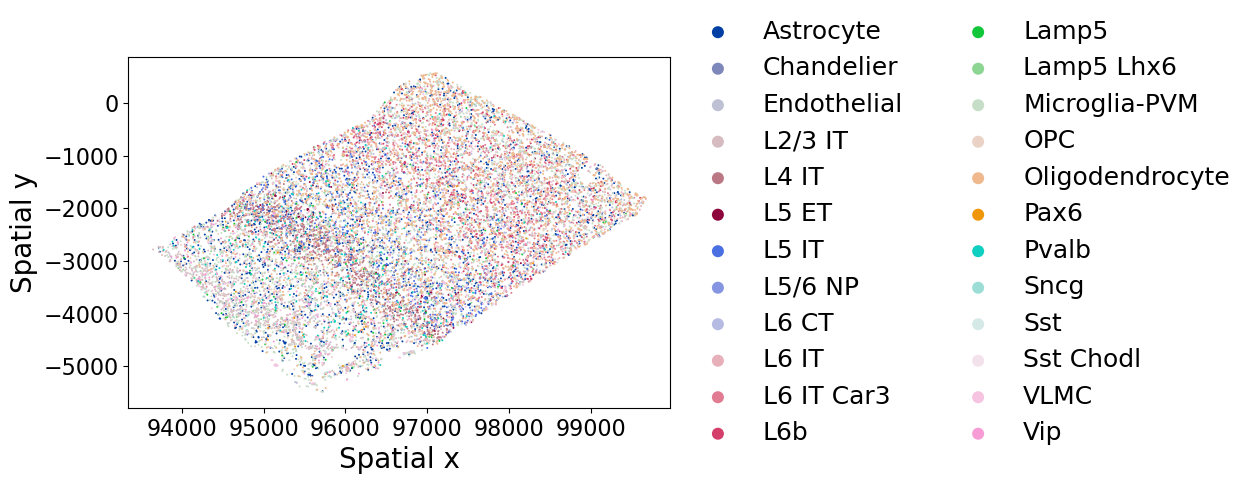

In [9]:
sc.pl.scatter(
        adata,
        x='Spatial x',#'Spatial x',
        y='Spatial y',#'Spatial y',
        color="cell_type",save="SP.pdf",title=""
)

In [10]:
#plot_cell_type(ad.AnnData(X=np.abs(adata.obsm["y"]), obs=adata.obs), fig_width=6, fig_height=5)

/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


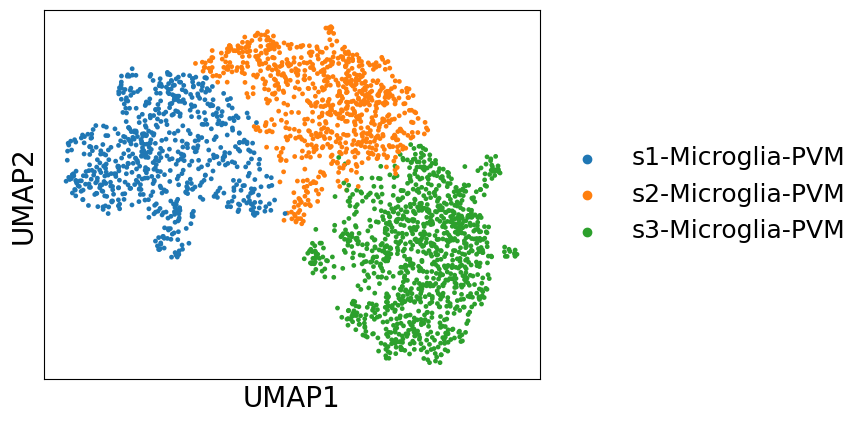

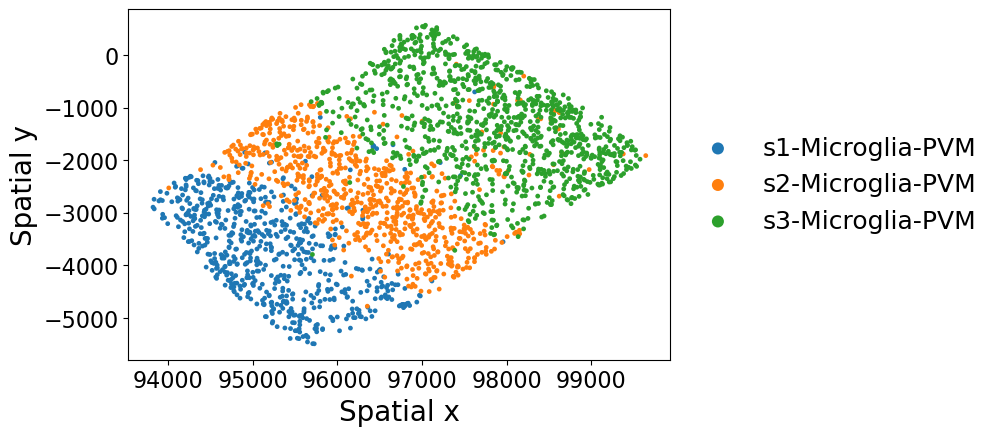

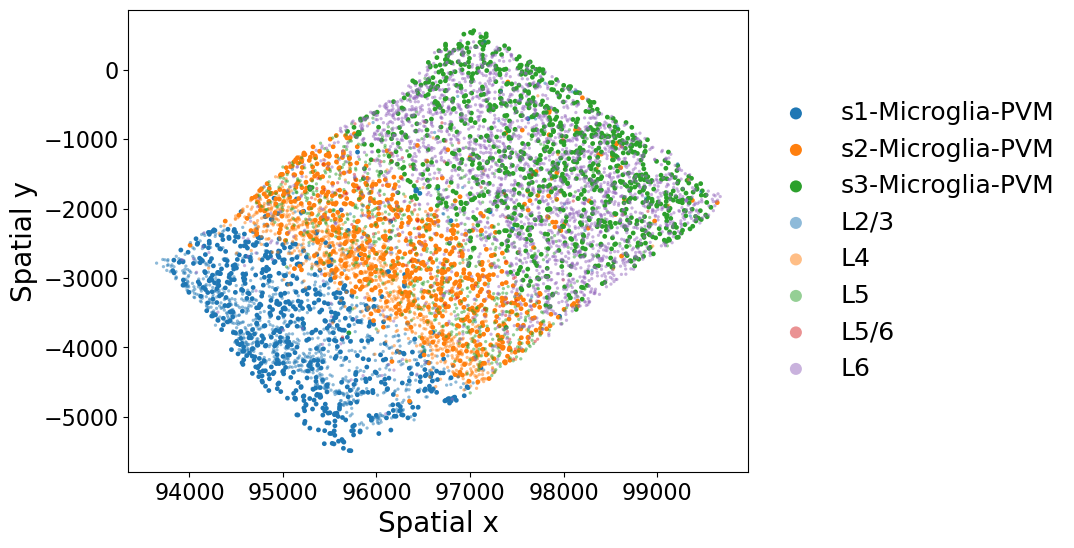

         Falling back to preprocessing with `sc.pp.pca` and default params.


/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


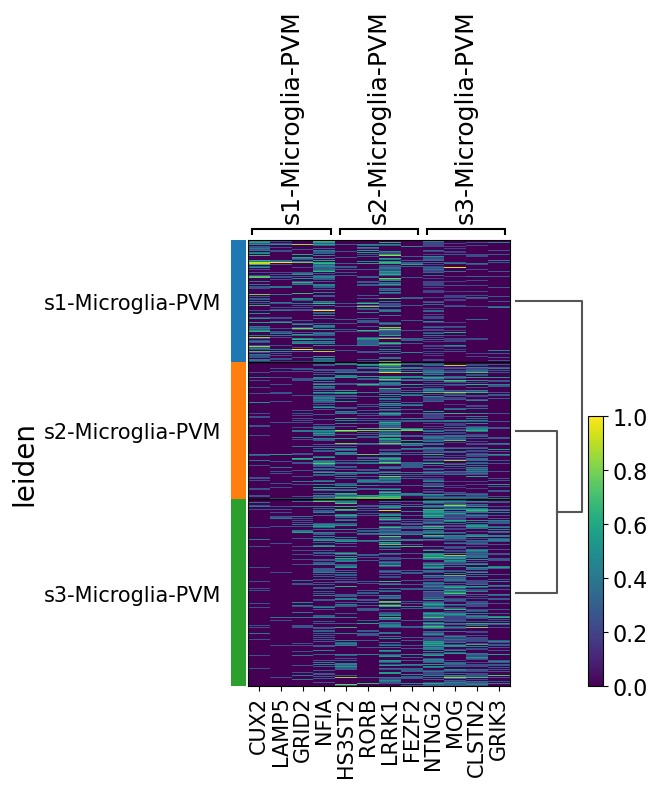

/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


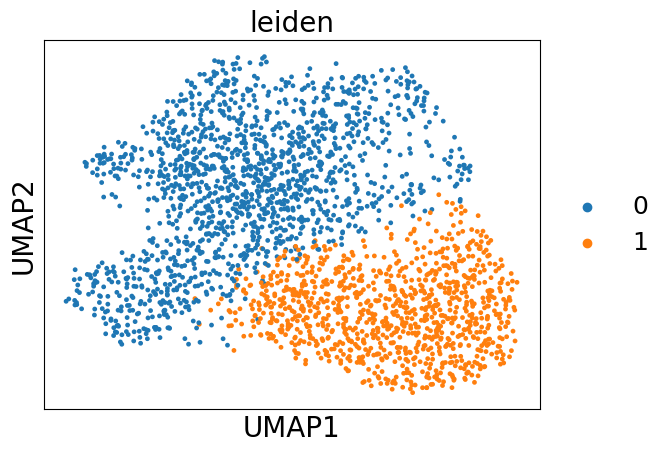

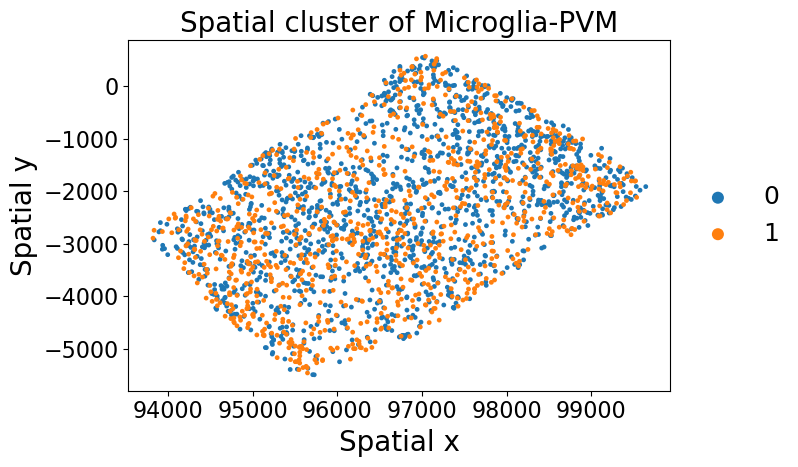

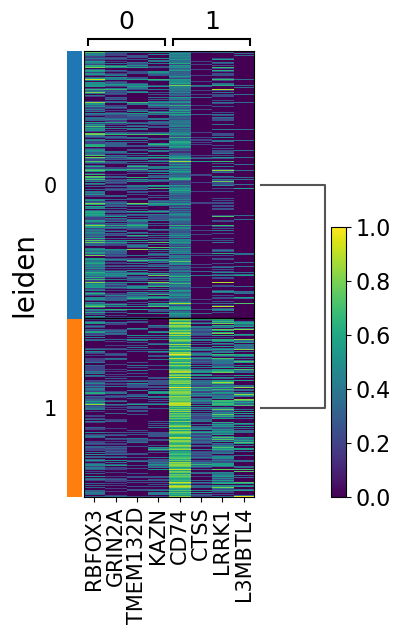

AnnData object with n_obs × n_vars = 2538 × 3360
    obs: 'cell_type', 'Spatial x', 'Spatial y', 'n_genes', 'leiden', 'leiden1', 'alpha', 'leiden_y'
    var: 'n_cells'
    uns: 'cell_type_colors', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'leiden1_colors'
    obsm: 'y', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


In [11]:
COI='Microglia-PVM'#'L2/3 IT'#'Microglia-PVM'

def plot(adata1,type_to_plot="Astrocyte",select=4):
    adata=adata1[adata1.obs["cell_type"]==type_to_plot]
    
    sc.tl.pca(adata, n_comps=50)
    sc.pp.neighbors(adata)  # Compute the neighborhood graph
    
    # Clustering
    sc.tl.leiden(adata,resolution=0.1)  # or sc.tl.louvain(adata)
    
    if COI=='Microglia-PVM':
        leiden_dict={
            "2":"s1-Microglia-PVM",
            "1":"s2-Microglia-PVM",
            "0":"s3-Microglia-PVM",
        }
        leiden_new=[leiden_dict[x] for x in adata.obs["leiden"].values]
        adata.obs["leiden"]=leiden_new
    else:
        adata.obs["leiden"]=["s"+str(int(i)+1)+"-"+COI for i in adata.obs["leiden"].values]
        
    # Plot UMAP
    sc.tl.umap(adata)  # Compute UMAP
    sc.pl.umap(adata, color='leiden',title="",save=COI.replace("/","-")+"-umap.pdf")

    sc.pl.scatter(
        adata,
        x='Spatial x',#'Spatial x',
        y='Spatial y',#'Spatial y',
        color="leiden",
        title="",save=COI.replace("/","-")+"-sp.pdf"
    )

    adata.obs['leiden1']=[x for x in adata.obs['leiden']]
    adata.obs["alpha"]=[True for i in range(adata.shape[0])]
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot adata with full opacity
    sc.pl.scatter(
        adata,
        x='Spatial x',
        y='Spatial y',
        color='leiden1',
        ax=ax,
        alpha=1,
        show=False
    )

    # Plot adata_neuron with reduced opacity
    sc.pl.scatter(
        adata_neuron,
        x='Spatial x',
        y='Spatial y',
        color='leiden1',
        ax=ax,
        alpha=0.5,title="",
        show=True,save=COI.replace("/","-")+"-sup1.pdf"
    )
    
    adata_y=ad.AnnData(X=np.abs(adata.obsm["y"]), obs=adata.obs)
    adata_y.var_names=genes
    sc.tl.rank_genes_groups(adata_y, 'leiden', method='wilcoxon')#sc.tl.rank_genes_groups(adata_type_attention, 'group', method='t-test')
    sc.pl.rank_genes_groups_heatmap(adata_y, n_genes=select, show_gene_labels=True,standard_scale='var', cmap='viridis')

    adata_y_type=ad.AnnData(X=np.abs(adata.obsm["y"]), obs=adata.obs)
    adata_y_type.var_names=genes
    sc.tl.pca(adata_y_type, n_comps=50)
    sc.pp.neighbors(adata_y_type)  # Compute the neighborhood graph
    sc.tl.leiden(adata_y_type,resolution=0.15)  # or sc.tl.louvain(adata)
    sc.tl.umap(adata_y_type)  # Compute UMAP
    sc.pl.umap(adata_y_type, color='leiden')
    sc.pl.scatter(
        adata_y_type,
        x='Spatial x',#'Spatial x',
        y='Spatial y',#'Spatial y',
        color="leiden",
        title=f"Spatial cluster of {type_to_plot}"
    )
    sc.tl.rank_genes_groups(adata_y_type, 'leiden', method='wilcoxon')#sc.tl.rank_genes_groups(adata_type_attention, 'group', method='t-test')
    sc.pl.rank_genes_groups_heatmap(adata_y_type, n_genes=select, show_gene_labels=True,standard_scale='var', cmap='viridis')
    
    adata.obs['leiden_y']=adata_y_type.obs['leiden']
    print(adata)
    return adata

adata_type=plot(adata,type_to_plot=COI)#'Microglia-PVM'  'L2/3 IT'

# for L2/3 IT:
if COI=="L2/3 IT":
    adata_type=adata_type[adata_type.obs["leiden"].isin(["s1-L2/3 IT","s2-L2/3 IT"])]

/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is de

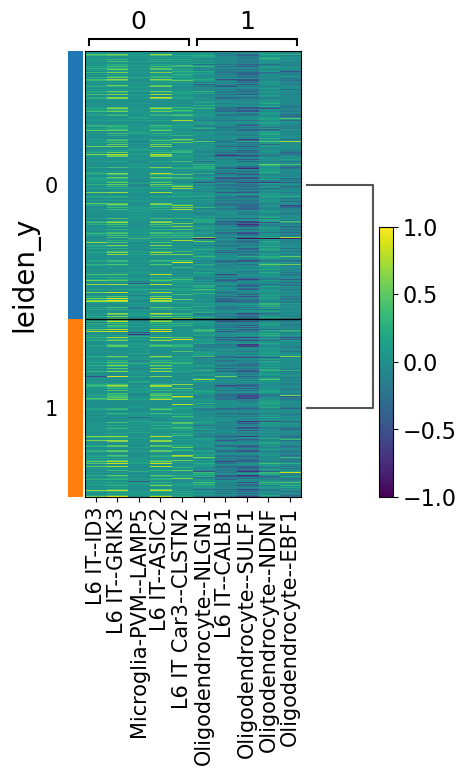

In [12]:
sc.tl.rank_genes_groups(adata_type, 'leiden_y', method='wilcoxon')#sc.tl.rank_genes_groups(adata_type_attention, 'group', method='t-test')
sc.pl.rank_genes_groups_heatmap(adata_type, n_genes=5, show_gene_labels=True, cmap='viridis')#,standard_scale='var'

In [13]:
def plot_subsub_type(adata1,groups):
    adata=adata1[adata1.obs["leiden"].isin(groups)]
    
    sc.tl.pca(adata, n_comps=50)
    sc.pp.neighbors(adata)  # Compute the neighborhood graph
    
    # Clustering
    sc.tl.leiden(adata,resolution=0.3)  # or sc.tl.louvain(adata)
    
    # Plot UMAP
    sc.tl.umap(adata)  # Compute UMAP
    sc.pl.umap(adata, color='leiden')

    sc.pl.scatter(
        adata,
        x='Spatial x',#'Spatial x',
        y='Spatial y',#'Spatial y',
        color="leiden"
    )
    print(adata)
    return adata

'''
select=5
adata_type_subsub=plot_subsub_type(adata_type,["1"])

adata_y_subsub=ad.AnnData(X=np.abs(adata_type_subsub.obsm["y"]), obs=adata_type_subsub.obs)
#adata_y=adata_y[adata_y.obs['leiden'].isin(["0","1"])]#,"2","2","3"
adata_y_subsub.var_names=genes
sc.tl.rank_genes_groups(adata_y_subsub, 'leiden', method='wilcoxon')#sc.tl.rank_genes_groups(adata_type_attention, 'group', method='t-test')
sc.pl.rank_genes_groups_heatmap(adata_y_subsub, n_genes=select, show_gene_labels=True,standard_scale='var', cmap='viridis')

sc.tl.rank_genes_groups(adata_type_subsub, 'leiden', method='wilcoxon')#sc.tl.rank_genes_groups(adata_type_attention, 'group', method='t-test')
sc.pl.rank_genes_groups_heatmap(adata_type_subsub, n_genes=select, show_gene_labels=True,standard_scale='var', cmap='viridis')

adata_aggregated_subsub=aggregate_all_genes(adata_type_subsub)
sc.pl.heatmap(adata_aggregated_subsub, var_names=adata_aggregated_subsub.var_names, groupby='leiden', cmap='bwr')
'''

'\nselect=5\nadata_type_subsub=plot_subsub_type(adata_type,["1"])\n\nadata_y_subsub=ad.AnnData(X=np.abs(adata_type_subsub.obsm["y"]), obs=adata_type_subsub.obs)\n#adata_y=adata_y[adata_y.obs[\'leiden\'].isin(["0","1"])]#,"2","2","3"\nadata_y_subsub.var_names=genes\nsc.tl.rank_genes_groups(adata_y_subsub, \'leiden\', method=\'wilcoxon\')#sc.tl.rank_genes_groups(adata_type_attention, \'group\', method=\'t-test\')\nsc.pl.rank_genes_groups_heatmap(adata_y_subsub, n_genes=select, show_gene_labels=True,standard_scale=\'var\', cmap=\'viridis\')\n\nsc.tl.rank_genes_groups(adata_type_subsub, \'leiden\', method=\'wilcoxon\')#sc.tl.rank_genes_groups(adata_type_attention, \'group\', method=\'t-test\')\nsc.pl.rank_genes_groups_heatmap(adata_type_subsub, n_genes=select, show_gene_labels=True,standard_scale=\'var\', cmap=\'viridis\')\n\nadata_aggregated_subsub=aggregate_all_genes(adata_type_subsub)\nsc.pl.heatmap(adata_aggregated_subsub, var_names=adata_aggregated_subsub.var_names, groupby=\'leiden\'

In [26]:
def filter_extreme_percentiles(adata, select, percentile_low=2, percentile_high=98):
    # Extracting and flattening the list of gene tuples
    gene_tuples = adata.uns['rank_genes_groups']['names'][:select]
    gene_names = [gene for tup in gene_tuples for gene in tup]  # Flatten the list of tuples into a list of gene names
    print(adata.uns['rank_genes_groups']['names'][:select],gene_names)
    # Remove duplicates if necessary
    gene_names = list(set(gene_names))

    # Data structure to keep track of which indices to keep
    indices_to_keep = set(range(adata.shape[0]))

    # Iterate over each gene, filter rows based on the percentiles
    for gene in gene_names:
        if gene in adata.var_names:
            # Calculate the low and high percentile values
            values = adata.obs_vector(gene)  # Get a numpy array of the values for this gene
            low_threshold = np.percentile(values, percentile_low)
            high_threshold = np.percentile(values, percentile_high)

            # Determine indices that fall outside the low and high thresholds
            filtered_indices = np.where((values >= low_threshold) & (values <= high_threshold))[0]
            indices_to_keep.intersection_update(filtered_indices)
        else:
            print(f"Gene {gene} not found in the variable names.")

    # Filter the adata to keep only the desired rows
    adata = adata[list(indices_to_keep), :]

    return adata

In [27]:
def extract_genes_and_pvals_by_group(adata, group_index, cutoff=0.05, up=True, name=None):
    # Extracting gene names and p-values from the adata object
    gene_names = adata.uns['rank_genes_groups']['names']
    p_values = adata.uns['rank_genes_groups']['pvals']
    logfoldchanges=adata.uns['rank_genes_groups']['logfoldchanges']
    p_adj=adata.uns['rank_genes_groups']['pvals_adj']
    
    # Lists to hold filtered gene names and their corresponding p-values
    filtered_genes = []
    filtered_pvals = []
    
    # Iterate through each group in the gene names and p-values
    for gene_group, pval_group,fold_group in zip(gene_names, p_adj, logfoldchanges):
        gene = gene_group[group_index]
        pval = pval_group[group_index]
        foldchange=fold_group[group_index]
        
        # Check if p-value is below the cutoff and add to the lists if it is
        #print(pval,foldchange)
        if pval < cutoff and ((foldchange>0)==up):
            filtered_genes.append(gene)
            filtered_pvals.append(pval)
    
    return filtered_genes, filtered_pvals

         Falling back to preprocessing with `sc.pp.pca` and default params.


/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


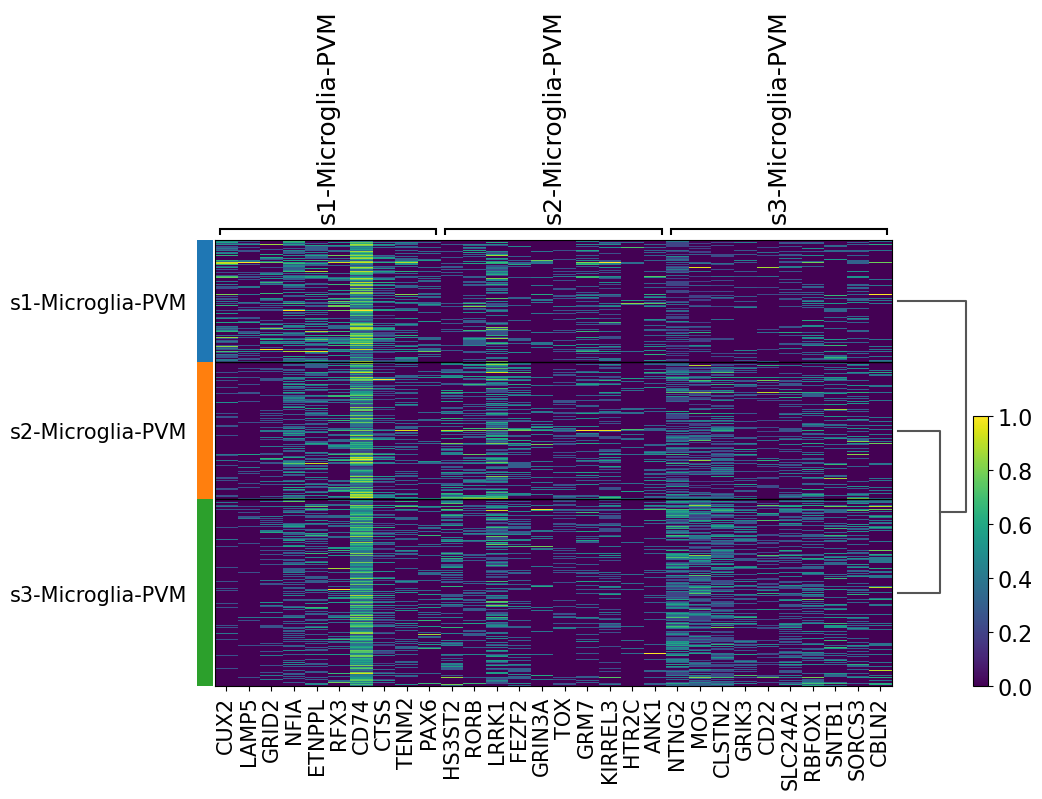

NameError: name 'extract_genes_and_pvals_by_group' is not defined

In [12]:
select=10
adata_y=ad.AnnData(X=np.abs(adata_type.obsm["y"]), obs=adata_type.obs)
#adata_y=adata_y[adata_y.obs['leiden'].isin(["0","1"])]#,"2","2","3"
adata_y.var_names=genes
sc.tl.rank_genes_groups(adata_y, 'leiden', method='wilcoxon')#sc.tl.rank_genes_groups(adata_type_attention, 'group', method='t-test')
# Generate the heatmap without displaying it immediately
sc.pl.rank_genes_groups_heatmap(adata_y, 
                                n_genes=select, 
                                show_gene_labels=True, 
                                standard_scale='var', 
                                cmap='viridis', 
                                show=False)
# Access all axes in the current figure
axes = plt.gcf().get_axes()
# Loop through each axis and remove the y-axis label
for ax in axes:
    ax.set_ylabel('')
# Show the plot
plt.savefig("./figures/"+COI.replace("/","-")+"-DE.pdf", bbox_inches='tight')
plt.show()
print(extract_genes_and_pvals_by_group(adata_y,1,0.05,True))
print(extract_genes_and_pvals_by_group(adata_y,1,0.05,False))

In [13]:
def print_adjusted_pvals(adata, n_genes=7):
    # Perform differential expression analysis
    sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
    
    # Extract the results from rank_genes_groups
    results = adata.uns['rank_genes_groups']
    
    # Get the groups
    groups = results['names'].dtype.names
    
    # Iterate through each group and get the top n_genes
    for group in groups:
        print(f"Group {group}:")
        
        # Get the top n_genes and their corresponding adjusted p-values
        gene_names = results['names'][group][:n_genes]
        pvals_adj = results['pvals_adj'][group][:n_genes]
        
        # Print the results
        for gene, pval_adj in zip(gene_names, pvals_adj):
            print(f"Gene: {gene}, Adjusted p-value: {pval_adj}")
        print()

print_adjusted_pvals(adata_y)

Group s1-Microglia-PVM:
Gene: CUX2, Adjusted p-value: 8.461253092507075e-64
Gene: LAMP5, Adjusted p-value: 6.197943348325059e-16
Gene: GRID2, Adjusted p-value: 1.863341297932385e-11
Gene: NFIA, Adjusted p-value: 9.732634566693617e-07
Gene: ETNPPL, Adjusted p-value: 1.5730306471519193e-06
Gene: RFX3, Adjusted p-value: 9.718091252588159e-06
Gene: CD74, Adjusted p-value: 1.0372175478888907e-05

Group s2-Microglia-PVM:
Gene: HS3ST2, Adjusted p-value: 8.023281171460667e-14
Gene: RORB, Adjusted p-value: 7.789239444277771e-12
Gene: LRRK1, Adjusted p-value: 1.8338005723467628e-11
Gene: FEZF2, Adjusted p-value: 4.125905587595742e-06
Gene: GRIN3A, Adjusted p-value: 0.00039085301955177245
Gene: TOX, Adjusted p-value: 0.0018207079237588957
Gene: GRM7, Adjusted p-value: 0.0018207079237588957

Group s3-Microglia-PVM:
Gene: NTNG2, Adjusted p-value: 4.4461007137740515e-52
Gene: MOG, Adjusted p-value: 4.4461007137740515e-52
Gene: CLSTN2, Adjusted p-value: 1.841165366591773e-34
Gene: GRIK3, Adjusted p-v

/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered i

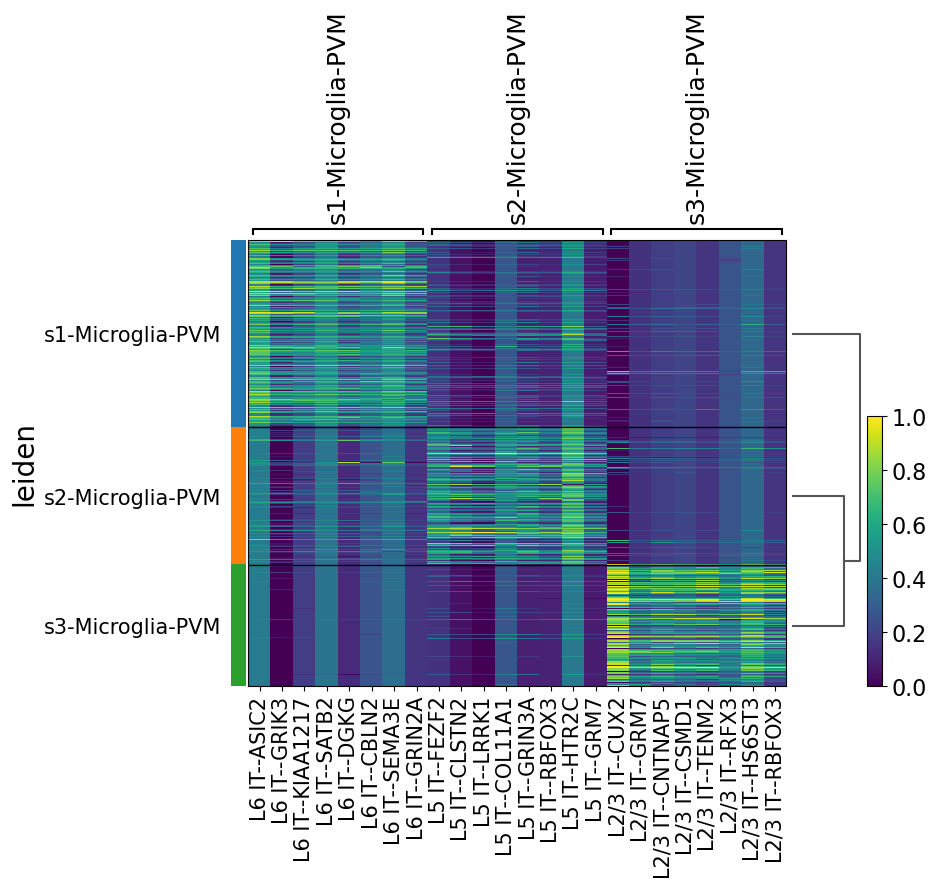

In [17]:
sc.tl.rank_genes_groups(adata_type, 'leiden', method='wilcoxon')#sc.tl.rank_genes_groups(adata_type_attention, 'group', method='t-test')
sc.pl.rank_genes_groups_heatmap(adata_type, n_genes=select, show_gene_labels=True,standard_scale='var', cmap='viridis')

#print(extract_genes_and_pvals_by_group(adata_type,1,0.05,True))
#print(extract_genes_and_pvals_by_group(adata_type,1,0.05,False))

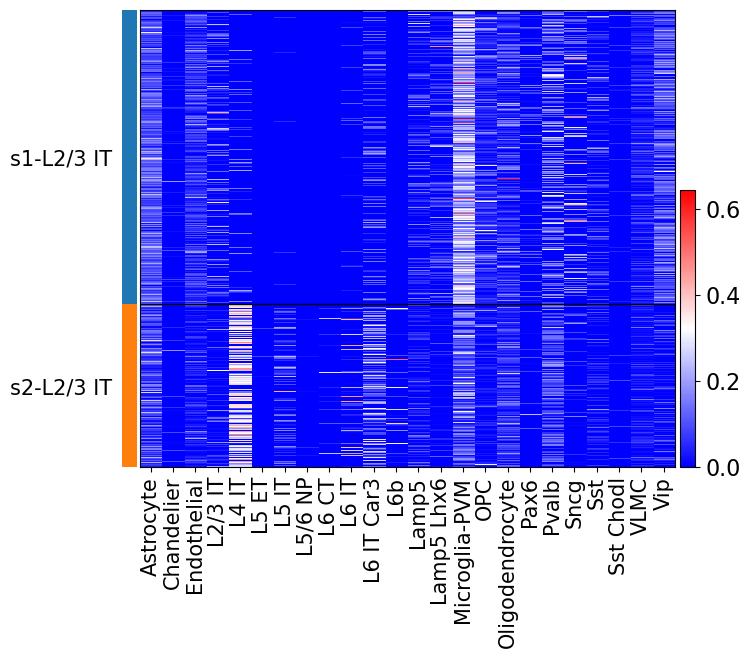

/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


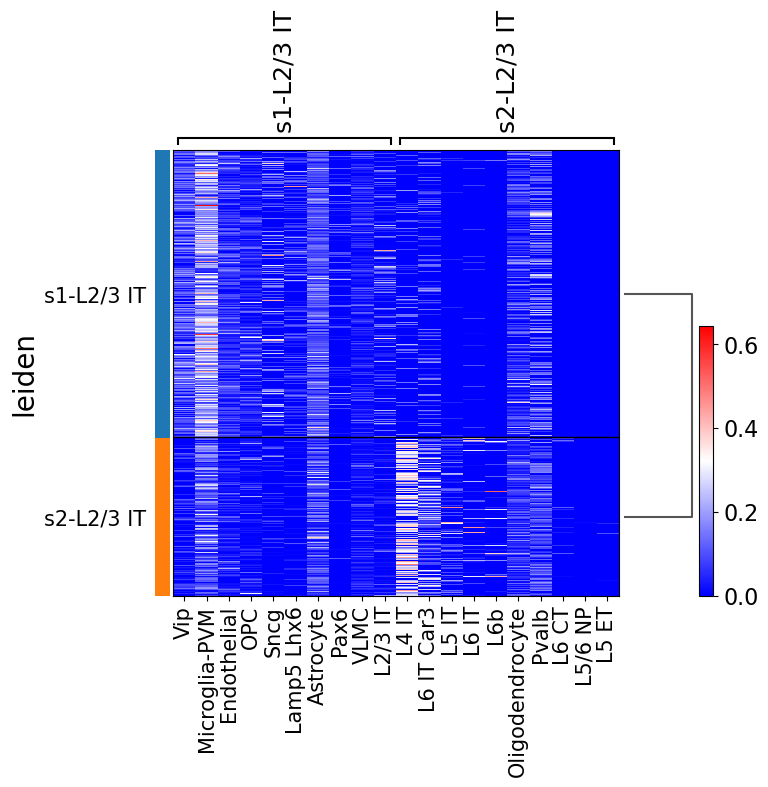

(['L4 IT', 'L6 IT Car3', 'L5 IT', 'L6 IT', 'L6b', 'Oligodendrocyte'], [7.232526822981028e-66, 2.481663809287289e-25, 3.2317251742174044e-23, 4.66184421755154e-07, 3.3667697791529787e-05, 0.019862610026046727])
(['VLMC', 'Pax6', 'Astrocyte', 'Lamp5 Lhx6', 'Sncg', 'OPC', 'Endothelial', 'Microglia-PVM', 'Vip'], [0.0024689763982657584, 0.0001228841379430305, 3.4360313920009585e-07, 1.7070237642432965e-07, 7.899247837881905e-09, 3.1497975405567846e-20, 1.1230203564055931e-26, 1.0892307230637132e-49, 1.1734947519765096e-51])


In [38]:
def aggregate_all_genes(adata):
    x=np.zeros((adata.shape[0],len(cell_types)))
    for i in range(len(cell_types)):
        offset=i*len(genes)
        x[:,i]=np.mean(np.abs(adata.X[:,offset:offset+len(genes)]),axis=1)
    #c=adata.shape[1]//len(genes)
    #x=x/c
    adata1=ad.AnnData(X=x, obs=adata.obs)
    adata1.var_names=cell_types
    return adata1

adata_aggregated=aggregate_all_genes(adata_type)
sc.pl.heatmap(adata_aggregated, var_names=adata_aggregated.var_names, groupby='leiden', cmap='bwr',show=False)
# Get the current axis
ax = plt.gca()
# Remove the y-axis label
ax.set_ylabel('')
# Show the plot
plt.savefig("./figures/"+COI.replace("/","-")+"-heat.pdf", bbox_inches='tight')
plt.show()

sc.tl.rank_genes_groups(adata_aggregated, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups_heatmap(adata_aggregated, n_genes=10, show_gene_labels=True, cmap='bwr')

print(extract_genes_and_pvals_by_group(adata_aggregated,1,0.05,True))
print(extract_genes_and_pvals_by_group(adata_aggregated,1,0.05,False))

/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


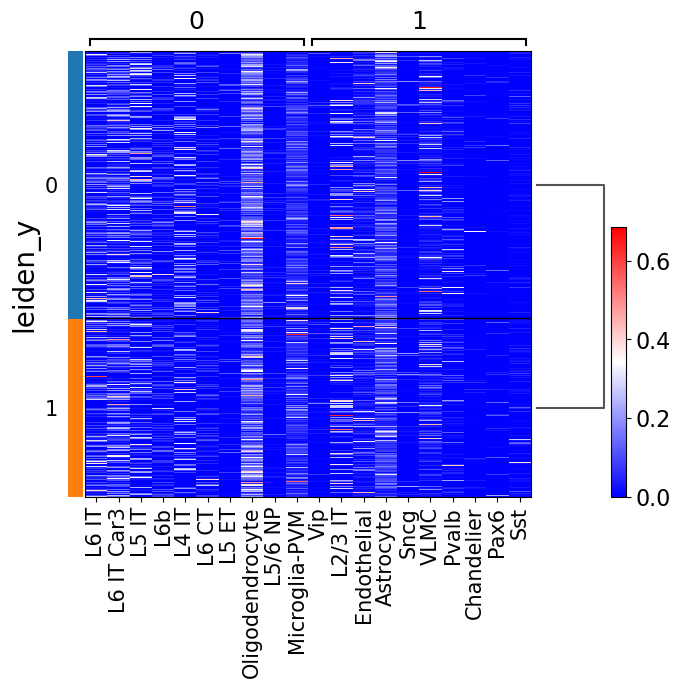

In [19]:
sc.tl.rank_genes_groups(adata_aggregated, 'leiden_y', method='wilcoxon')
sc.pl.rank_genes_groups_heatmap(adata_aggregated, n_genes=10, show_gene_labels=True, cmap='bwr')

1.0
[0.49991798 0.16104546 0.40598533 0.04074273 0.96168292 0.04661577
 0.4478763  0.08010287 0.         0.0782081  0.35758114 0.
 0.19424905 0.08258291 0.41298255 0.29842481 0.4555819  0.
 0.6554628  0.08717065 0.23878586 0.         0.2353777  0.14463672] [-0.1983759  -0.3231166  -0.18105559 -0.38497669 -0.32125634  0.
 -0.5085063   0.         -0.43152726 -0.66478431 -0.39877298 -0.79977906
 -0.30216125 -0.4275226  -0.64642739 -0.37859198 -0.12128201 -0.31693718
 -0.06560837 -0.62484157 -0.37738028 -0.0977447  -0.29364425 -0.70111692]


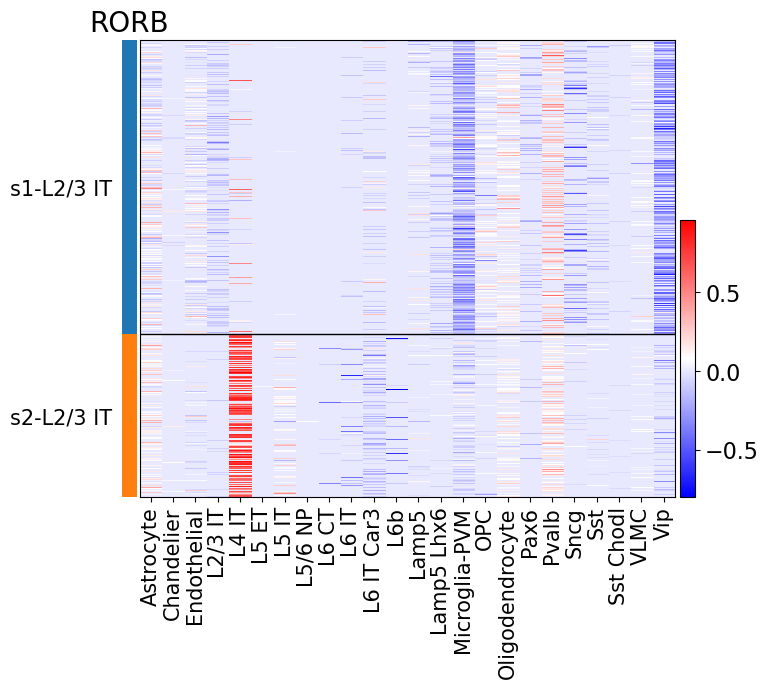

/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is de

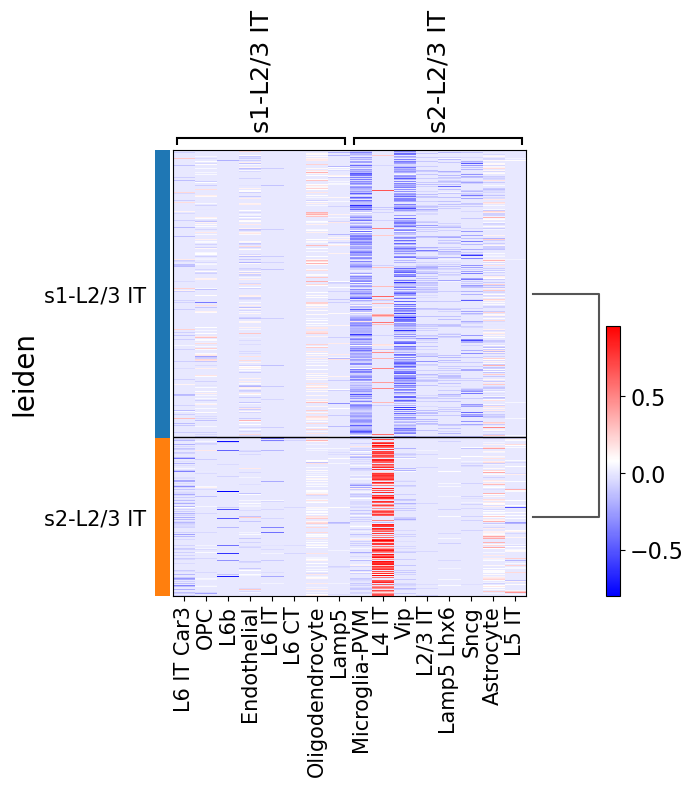

(['L4 IT', 'Astrocyte', 'L5 IT', 'Pvalb', 'L6b', 'L6 IT Car3'], [9.521389572210234e-68, 1.7159505827289705e-10, 3.872920770491503e-05, 0.043464928724942745, 0.021208620060906312, 2.432244978491252e-19])
(['Microglia-PVM', 'Vip', 'L2/3 IT', 'Lamp5 Lhx6', 'Sncg', 'Sst', 'Pax6', 'Endothelial', 'OPC'], [4.924857377329934e-69, 5.095237635962015e-52, 1.8834167978829265e-16, 4.793442181703417e-11, 9.637316439792038e-11, 3.872920770491503e-05, 0.001390888036976369, 0.025291694783383854, 0.008240410455125937])


In [39]:
genei="RORB"#"MOG"

def select_CCI_genes(adata,gene):
    x=np.zeros((adata.shape[0],len(cell_types)))

    offset=genes.index(gene)
    for i in range(len(cell_types)):
        x[:,i]=x[:,i]+adata.X[:,i*len(genes)+offset]
    
    adata1=ad.AnnData(X=x, obs=adata.obs)
    adata1.var_names=cell_types
    return adata1
print(np.max(adata_type.X))
adata_gene=select_CCI_genes(adata_type,genei)
#adata_gene=adata_gene[:,np.sum(adata_gene.X==0,axis=0)<=adata_gene.shape[0]*0.8]

print(np.max(adata_gene.X,axis=0),np.min(adata_gene.X,axis=0))

sc.pl.heatmap(adata_gene, var_names=adata_aggregated.var_names, groupby='leiden', cmap='bwr',show=False)
# Get the current axis
ax = plt.gca()
# Remove the y-axis label
ax.set_ylabel('')
ax.set_title(genei)
#plt.title("RORB")
# Show the plot
plt.savefig("./figures/"+COI.replace("/","-")+"-"+genei+"-heat.pdf", bbox_inches='tight')
plt.show()

sc.tl.rank_genes_groups(adata_gene, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups_heatmap(adata_gene, n_genes=8, show_gene_labels=True, cmap='bwr')

print(extract_genes_and_pvals_by_group(adata_gene,1,0.05,True))
print(extract_genes_and_pvals_by_group(adata_gene,1,0.05,False))